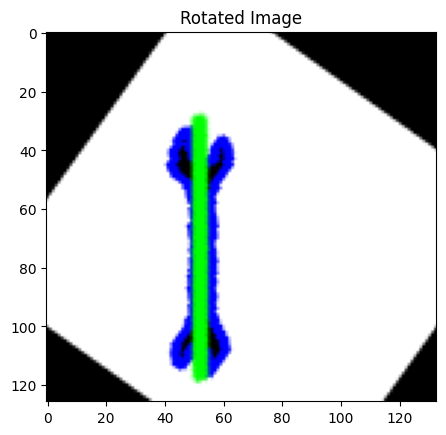

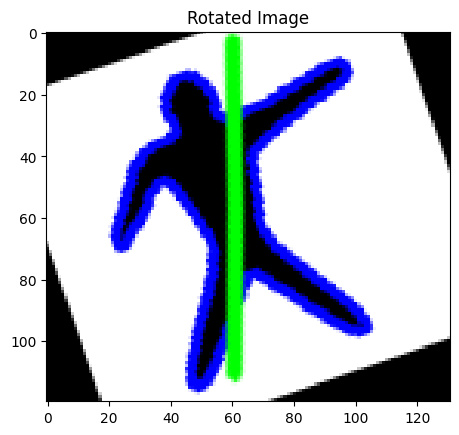

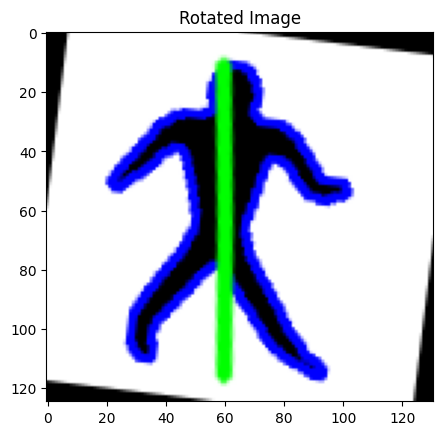

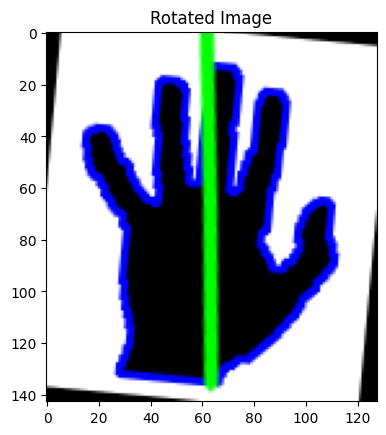

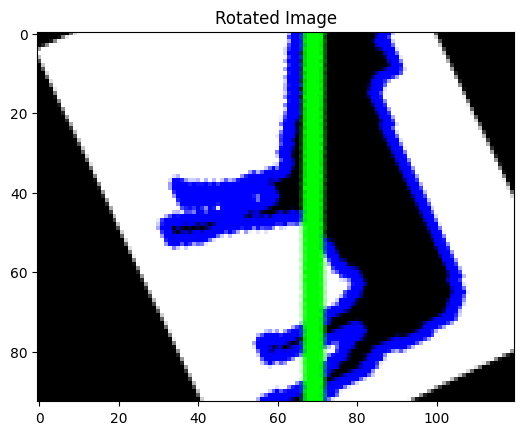

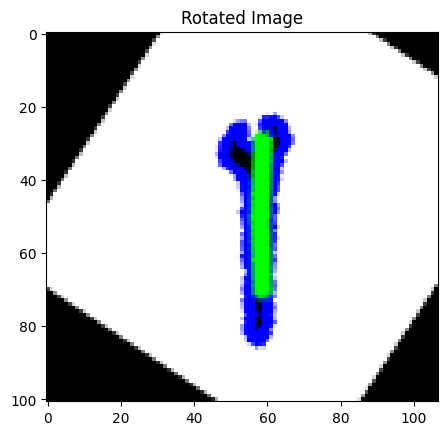

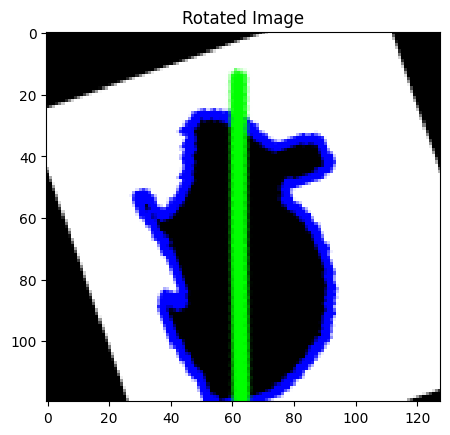

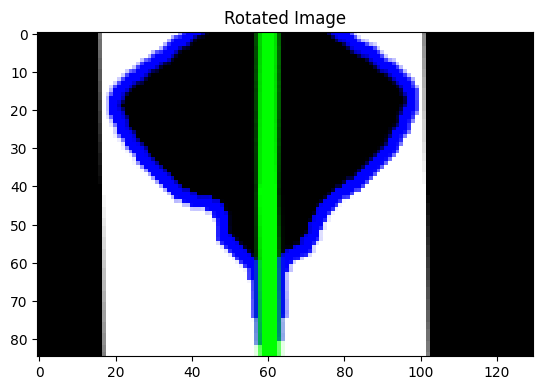

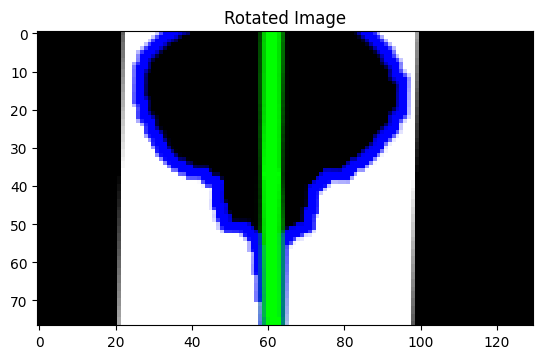

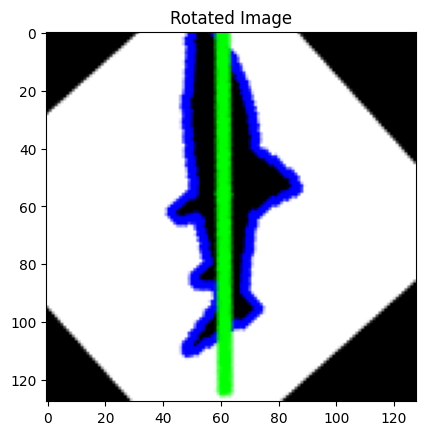

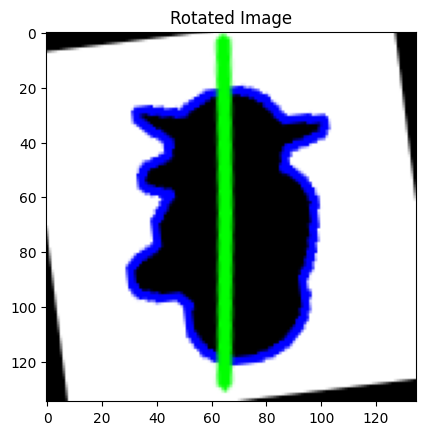

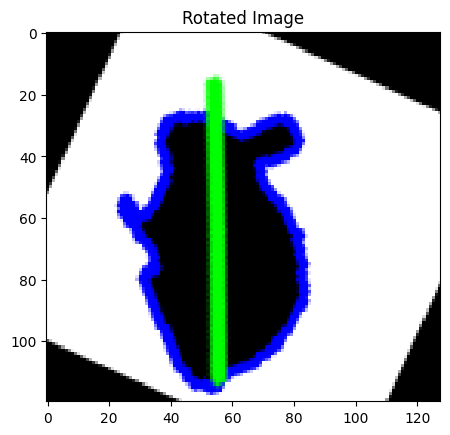

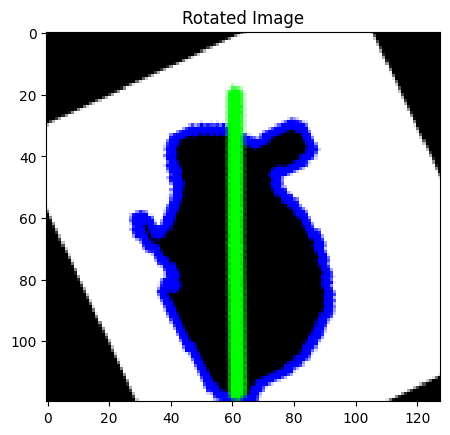

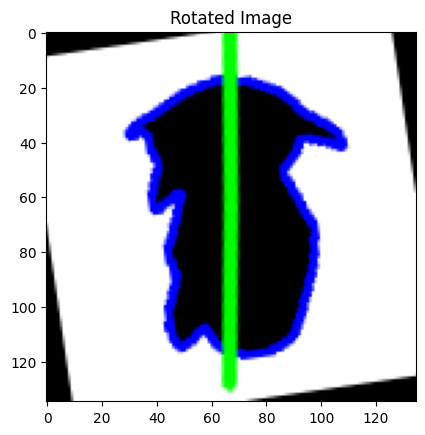

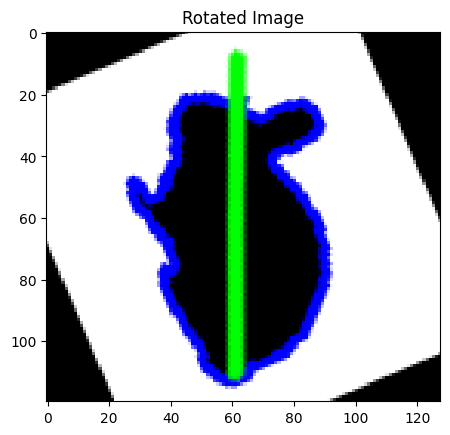

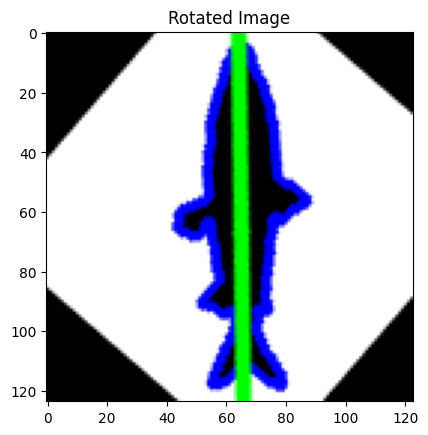

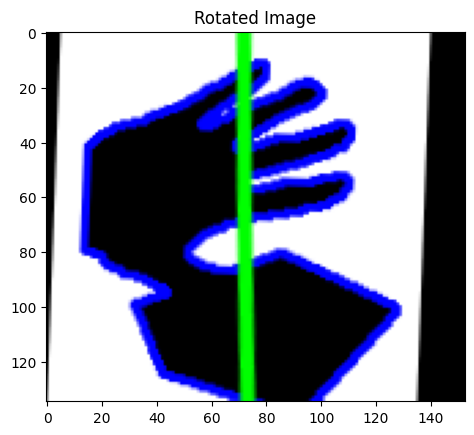

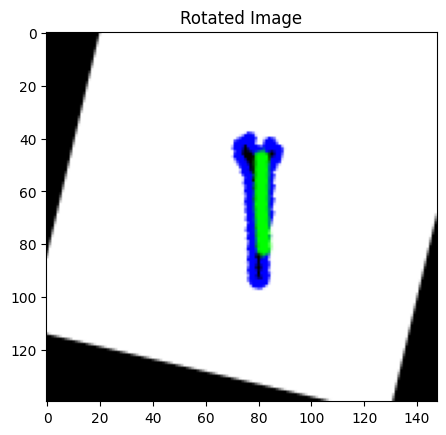

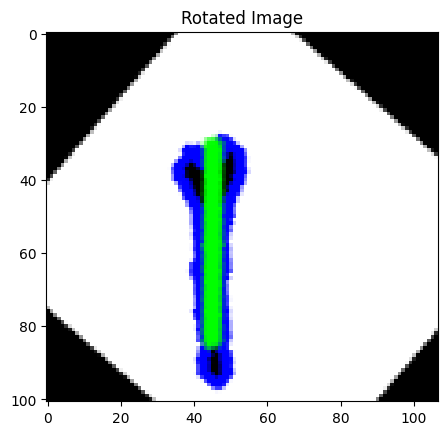

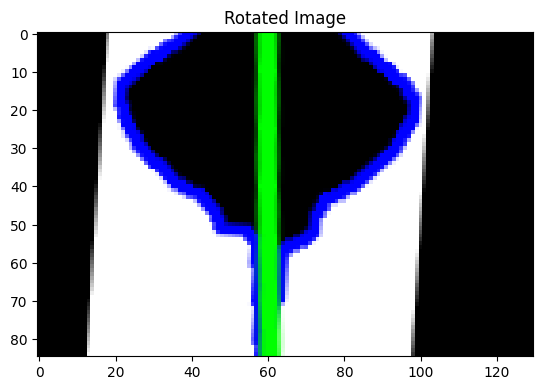

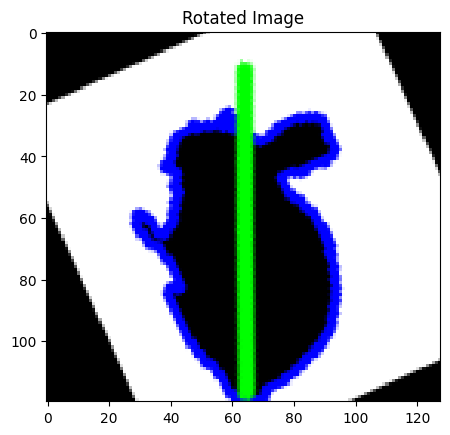

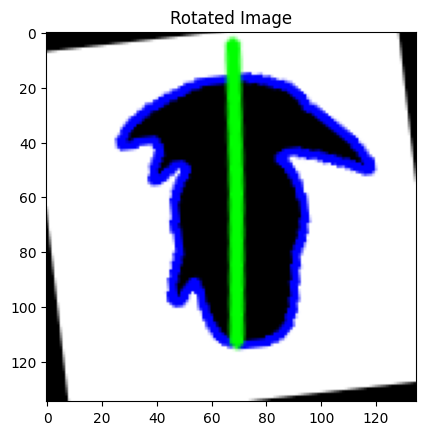

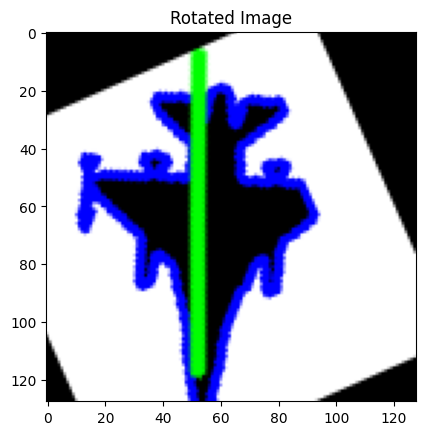

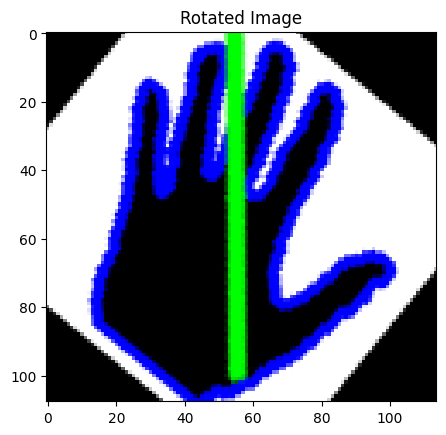

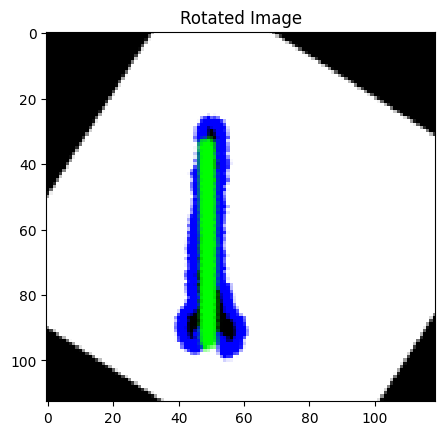

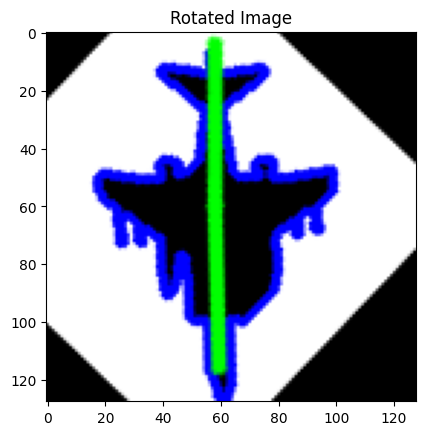

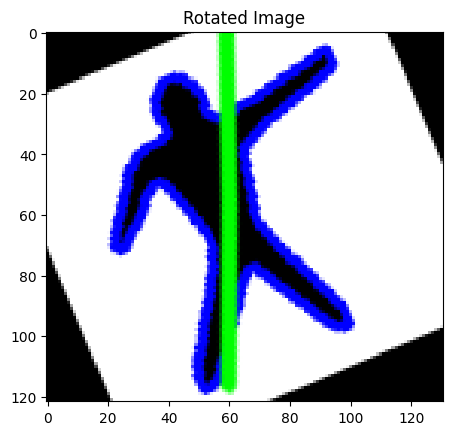

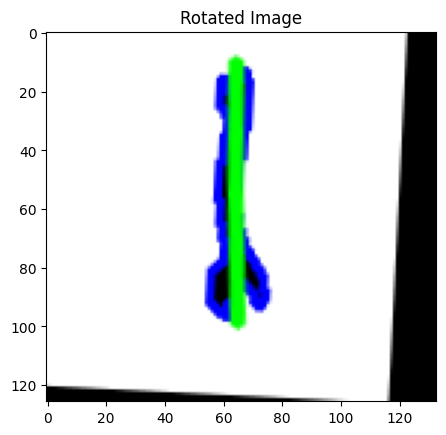

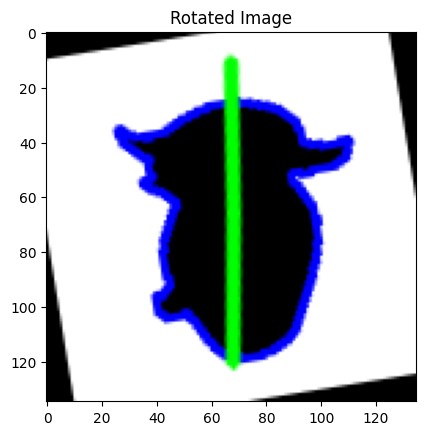

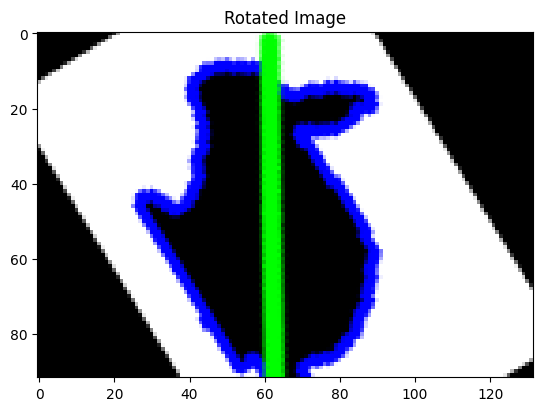

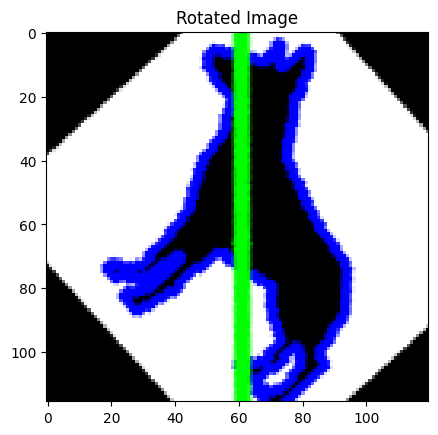

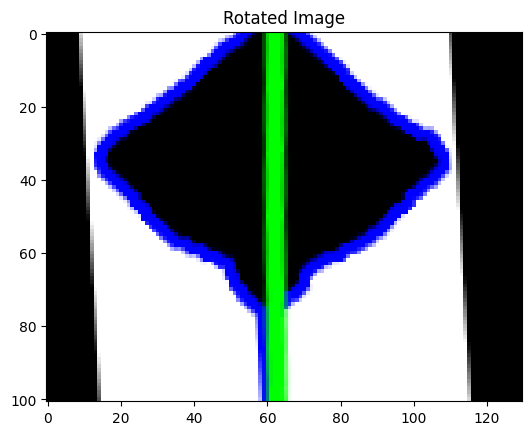

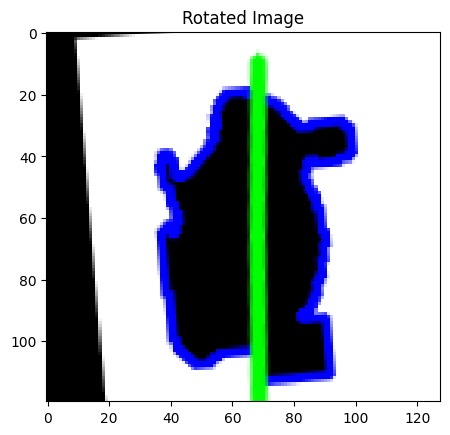

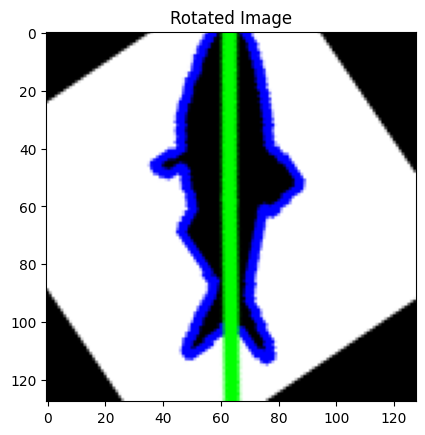

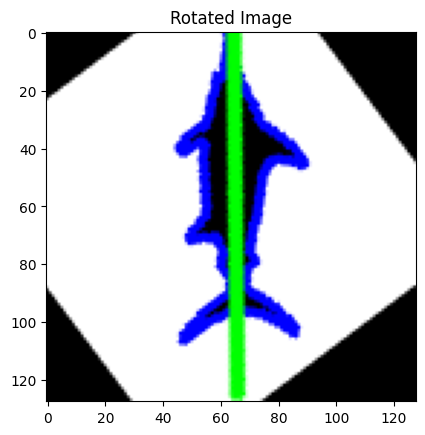

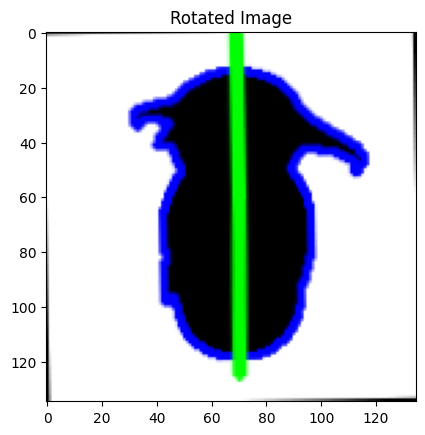

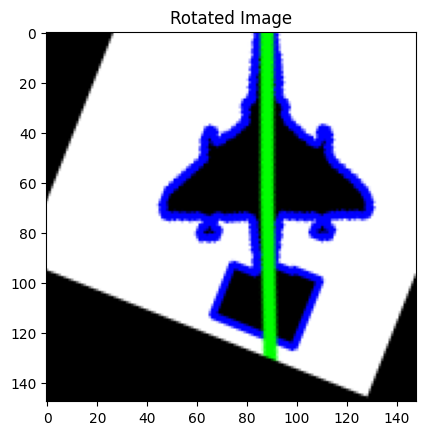

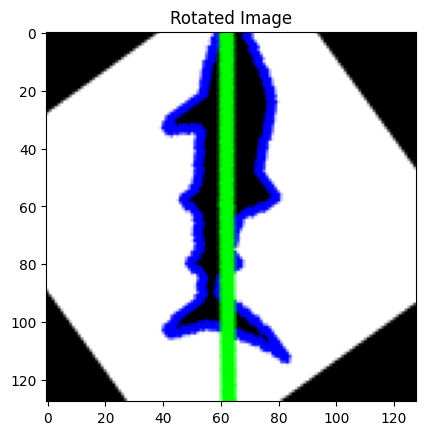

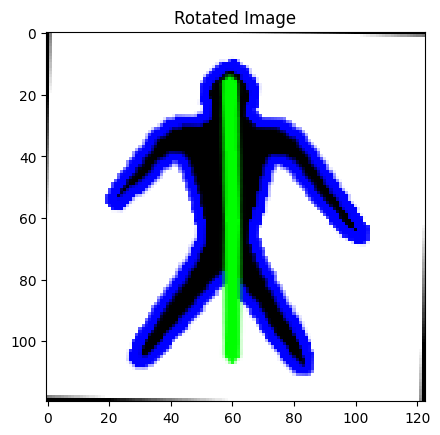

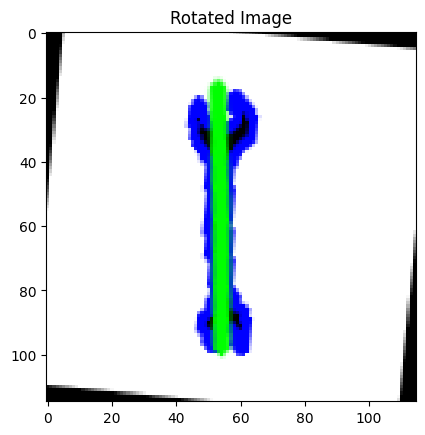

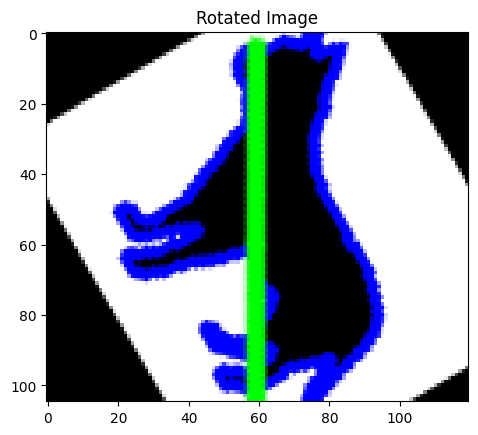

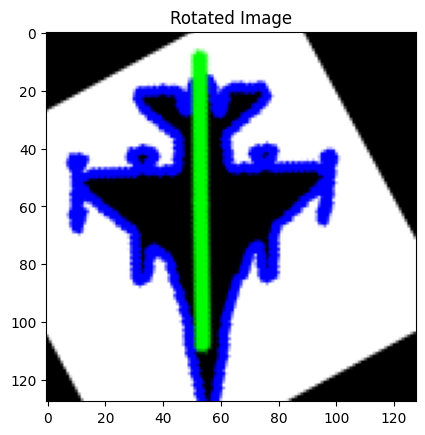

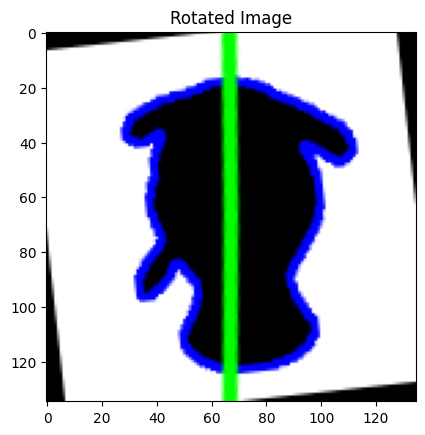

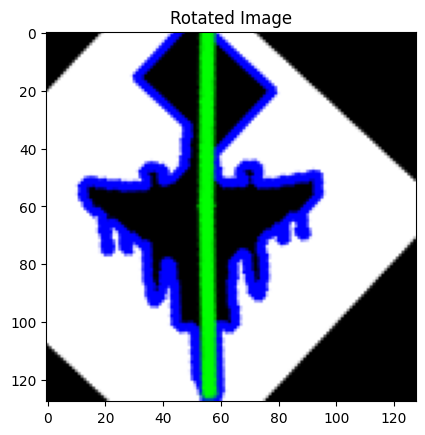

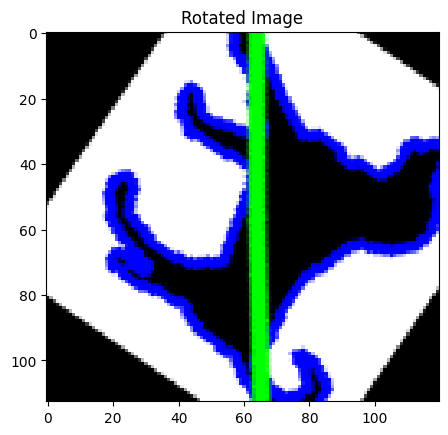

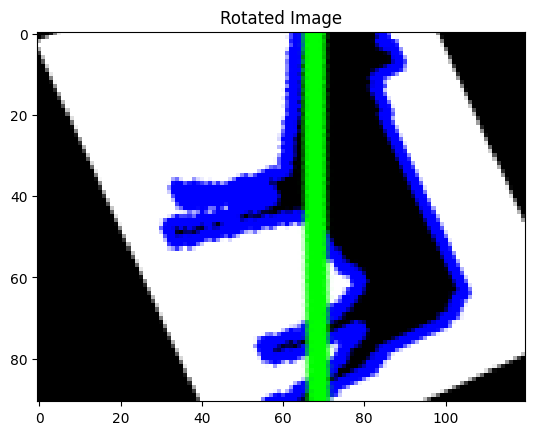

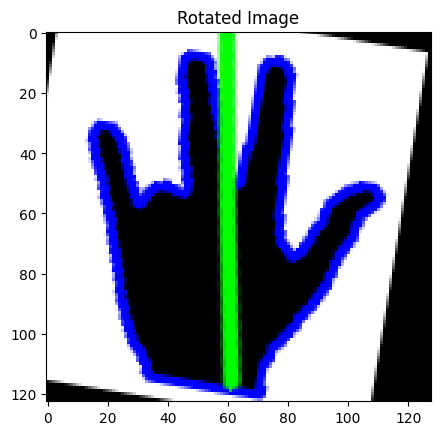

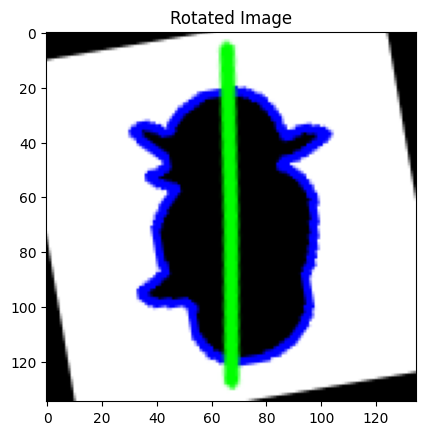

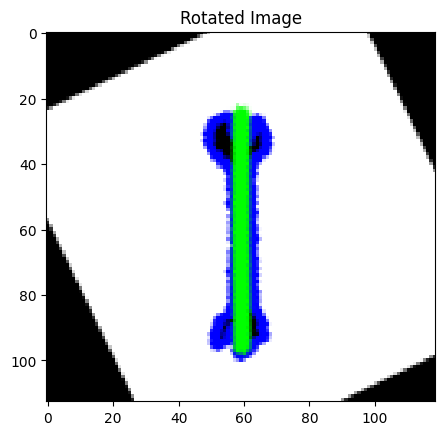

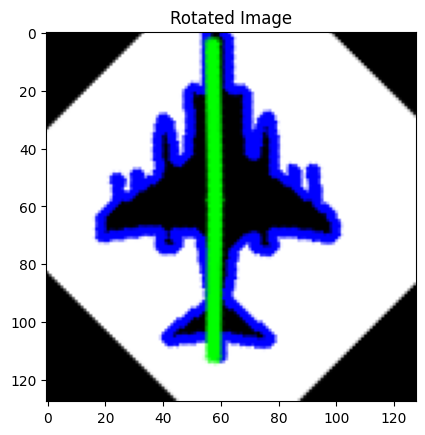

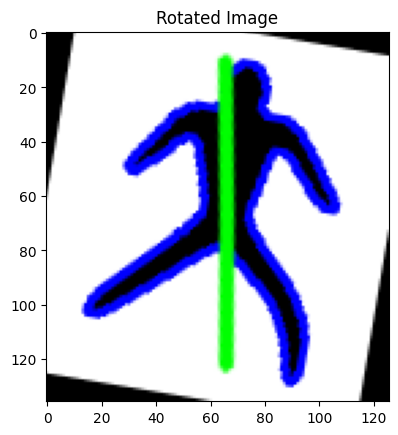

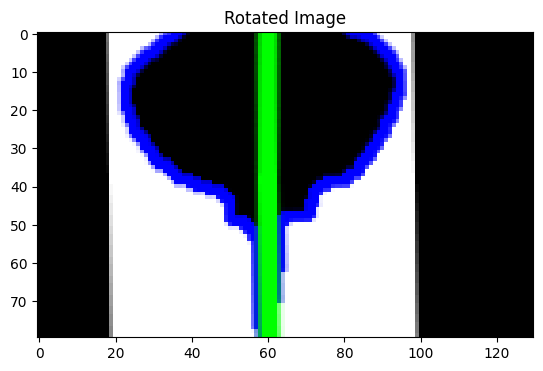

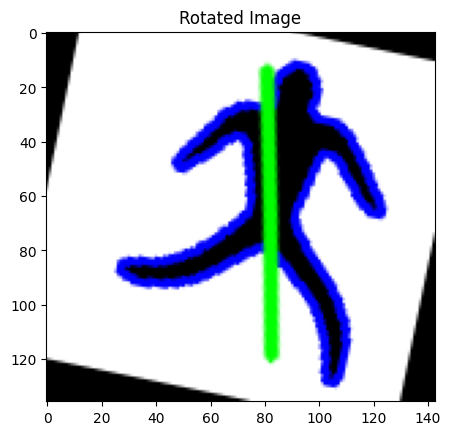

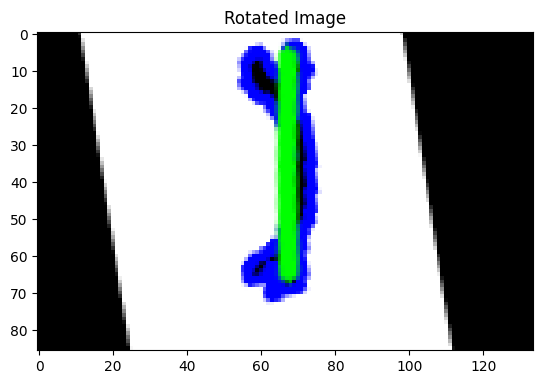

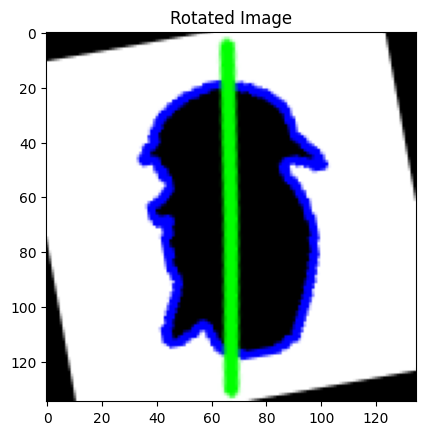

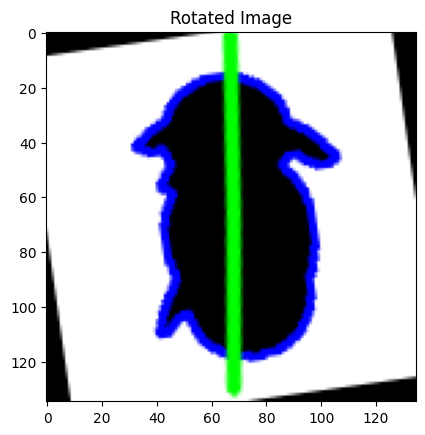

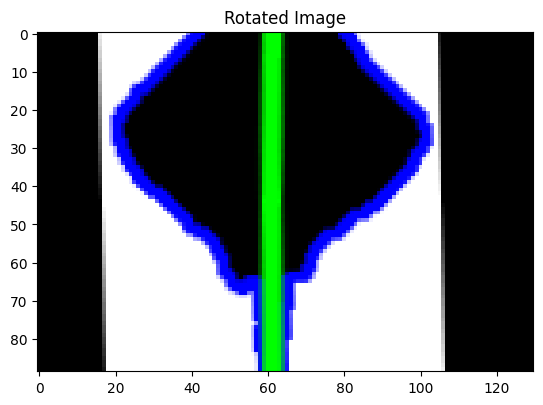

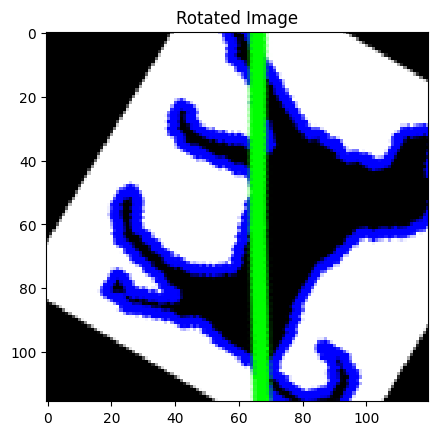

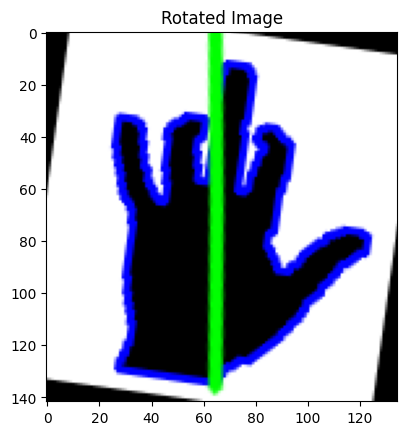

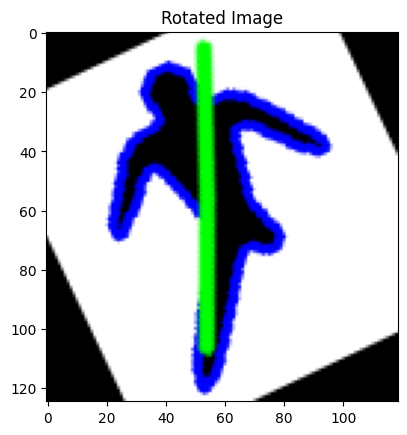

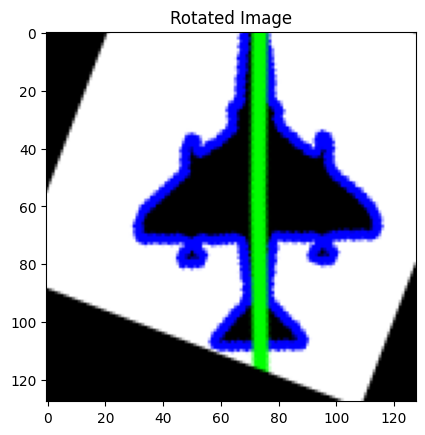

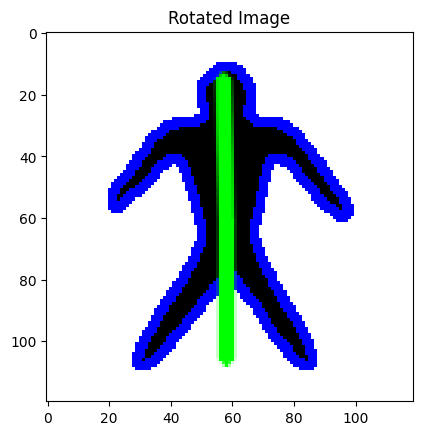

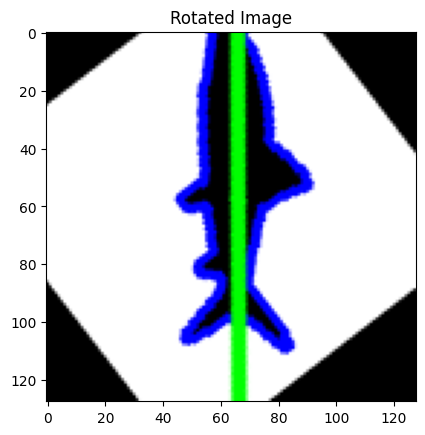

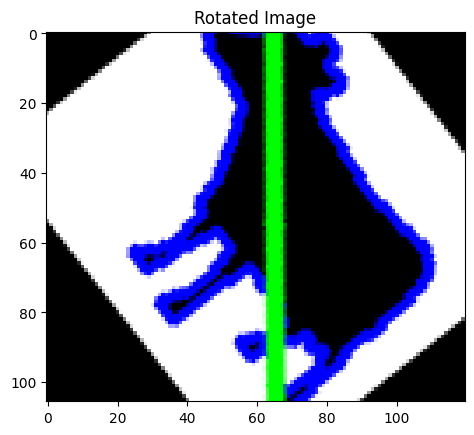

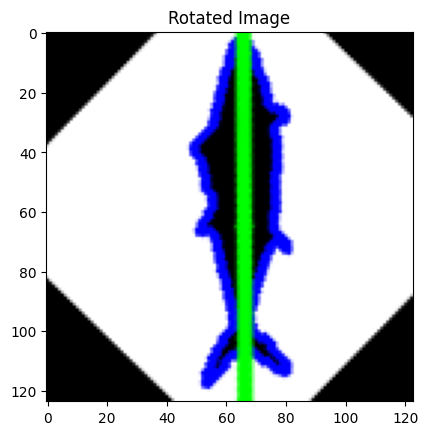

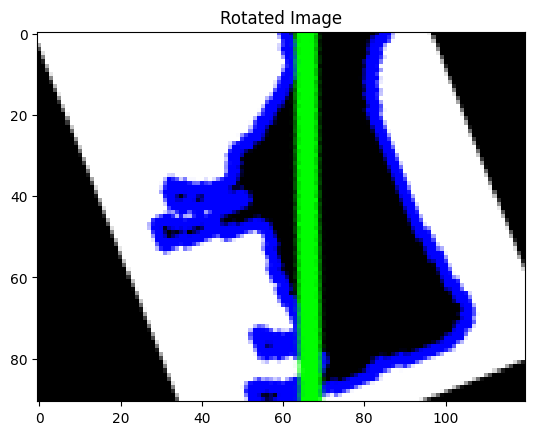

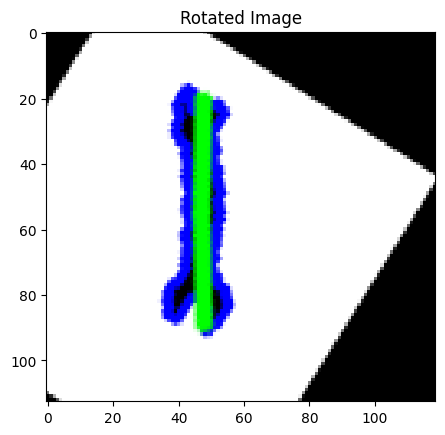

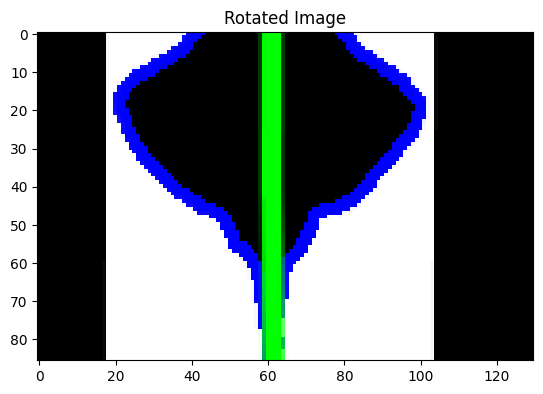

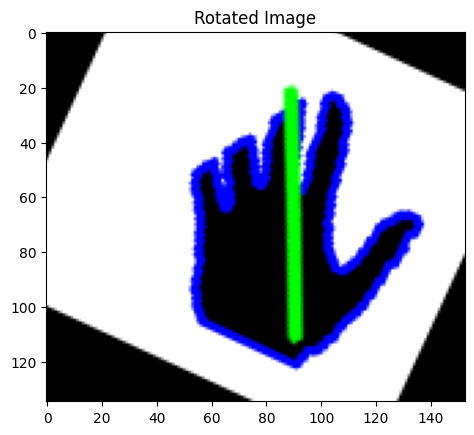

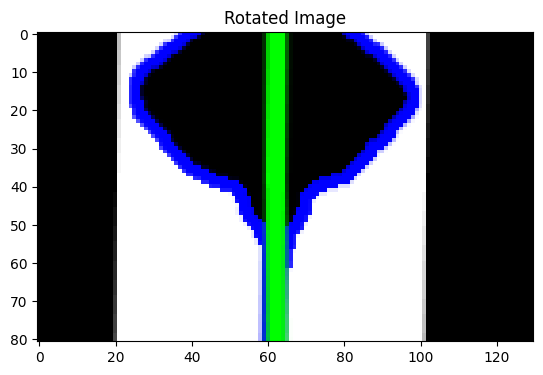

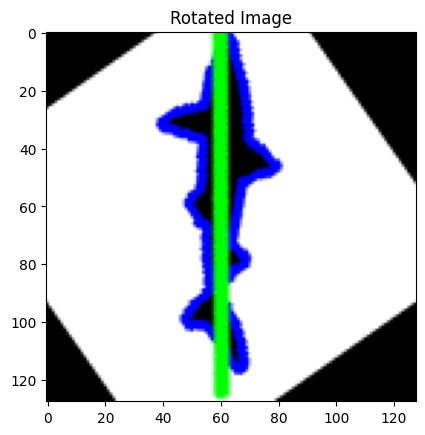

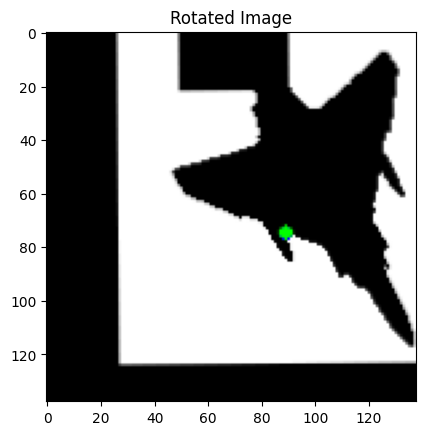

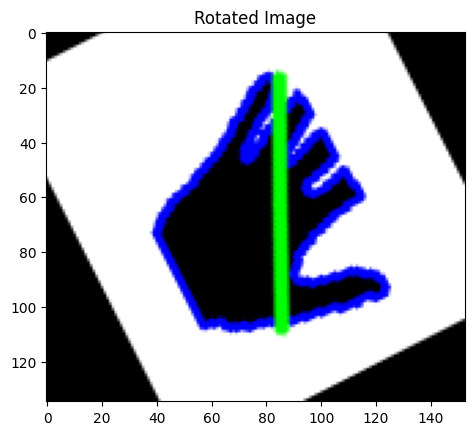

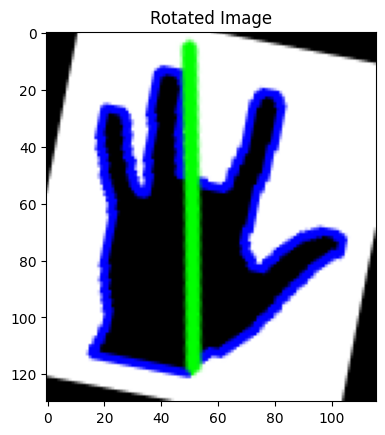

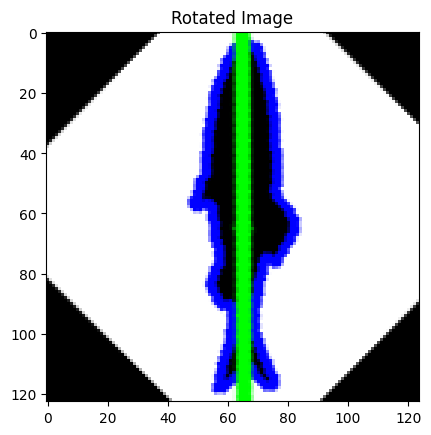

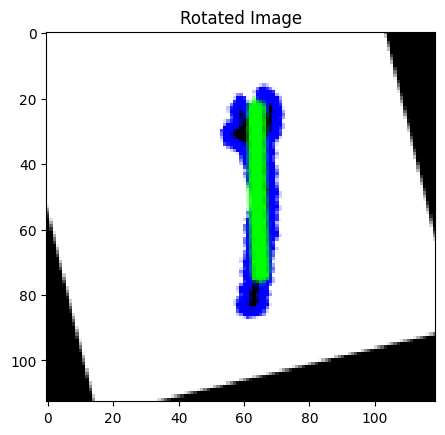

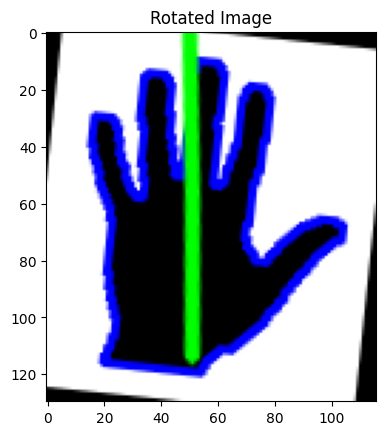

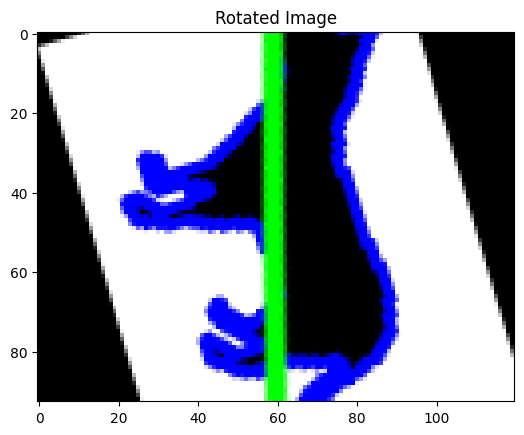

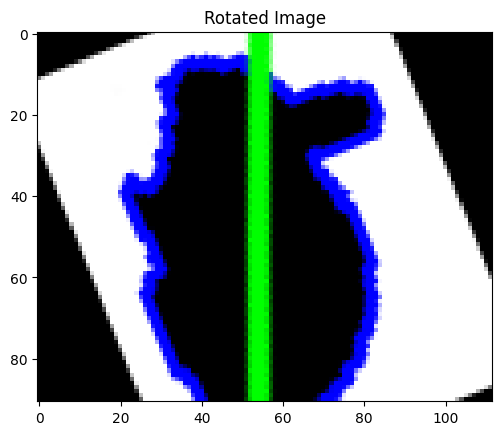

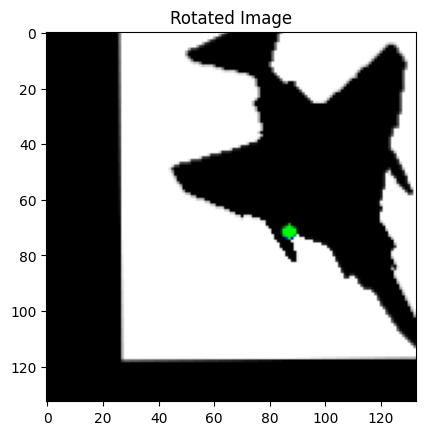

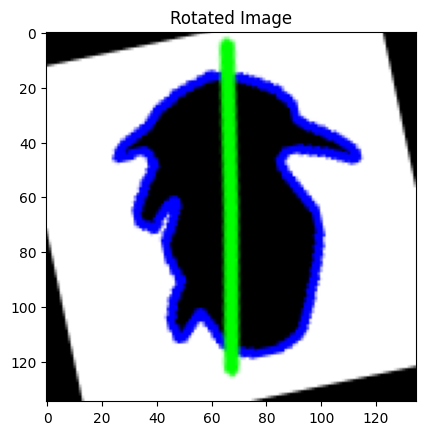

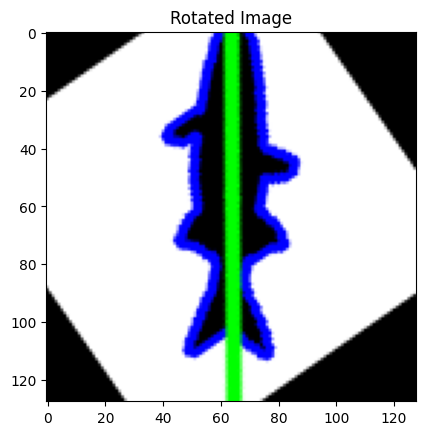

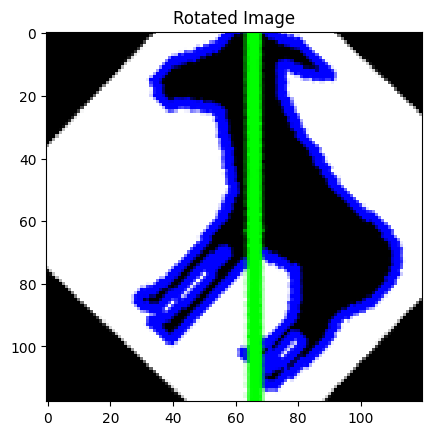

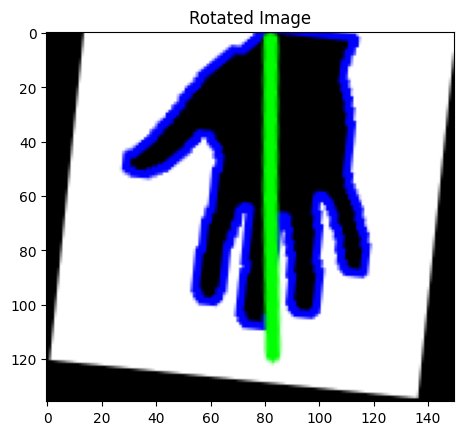

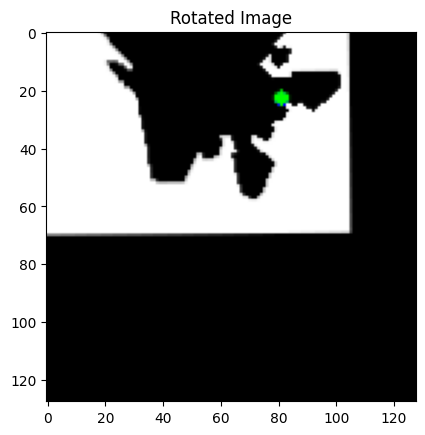

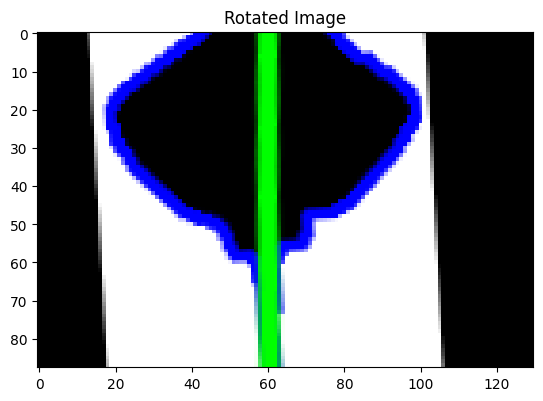

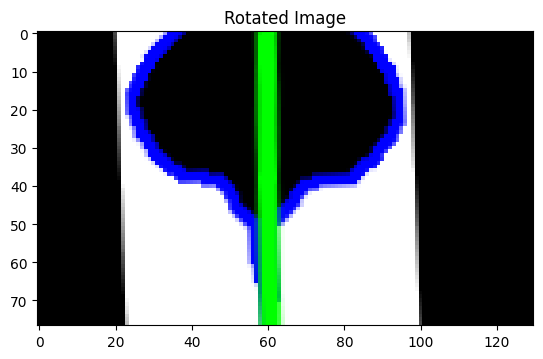

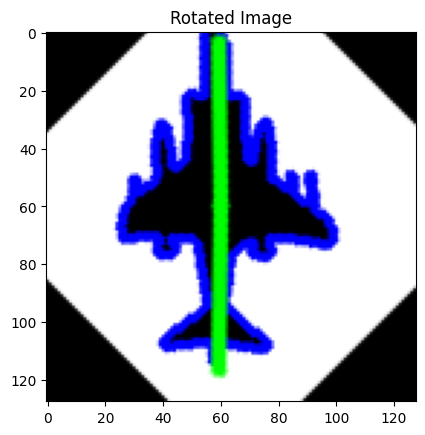

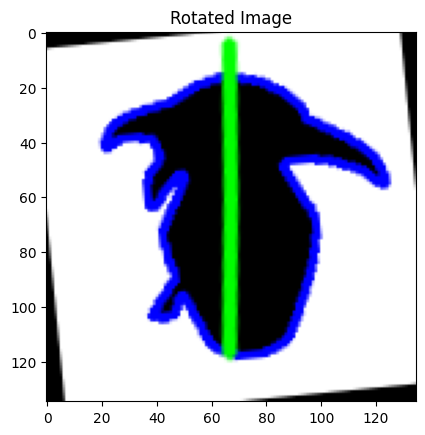

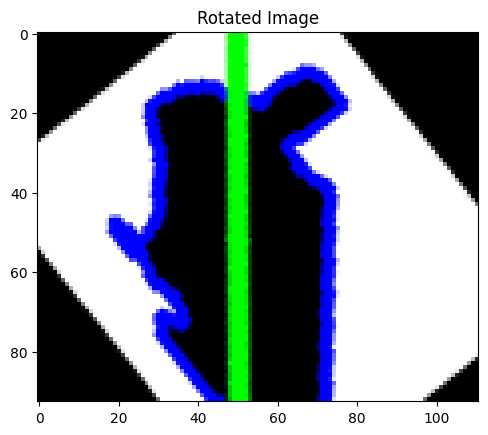

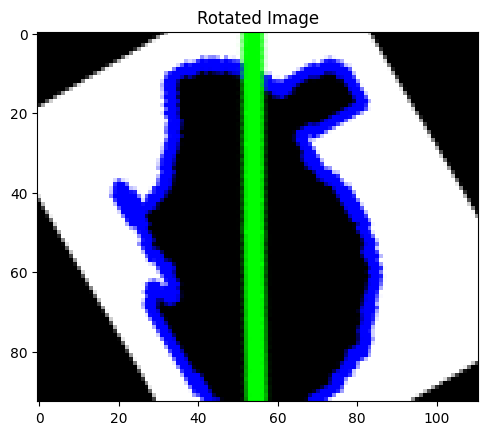

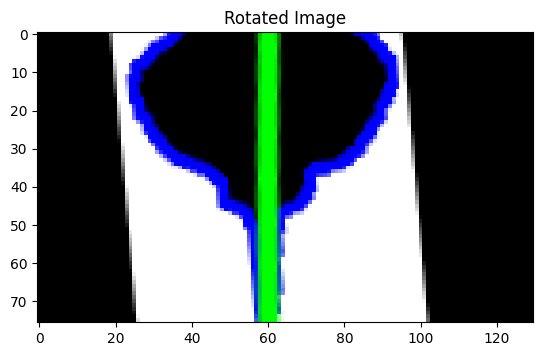

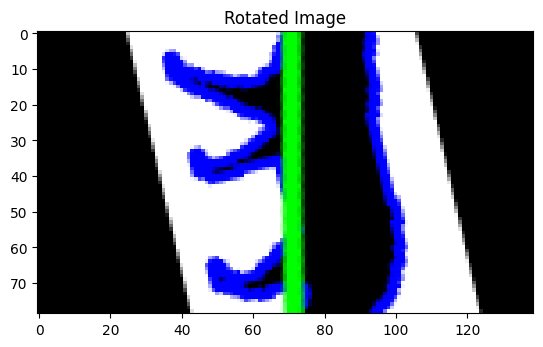

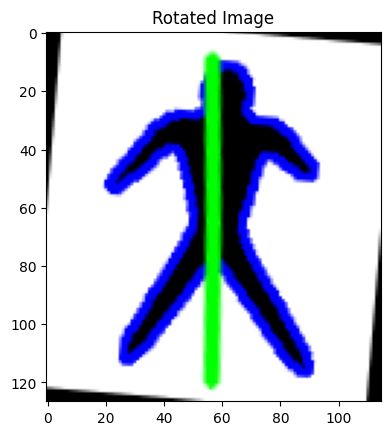

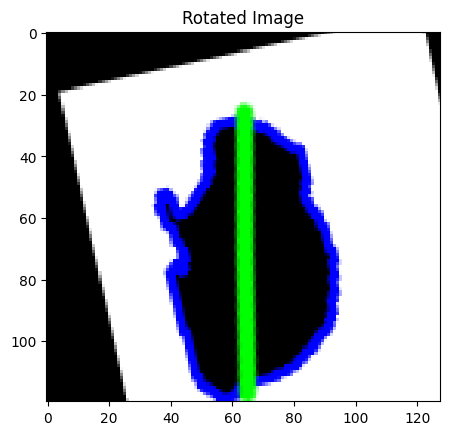

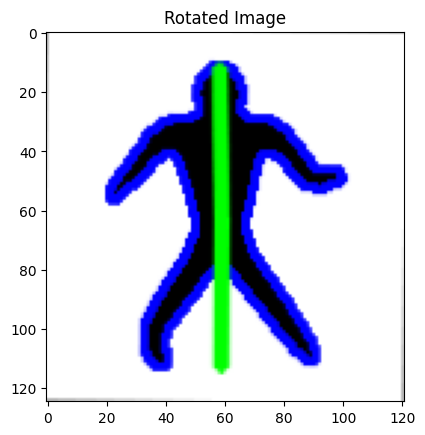

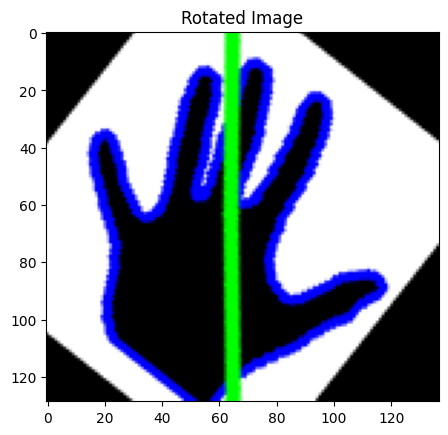

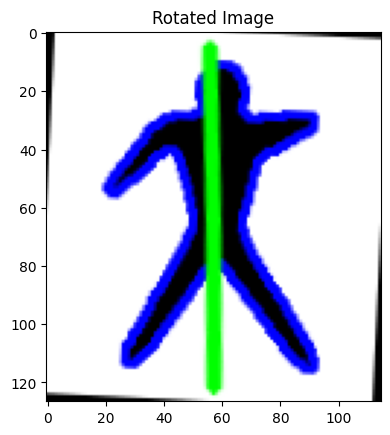

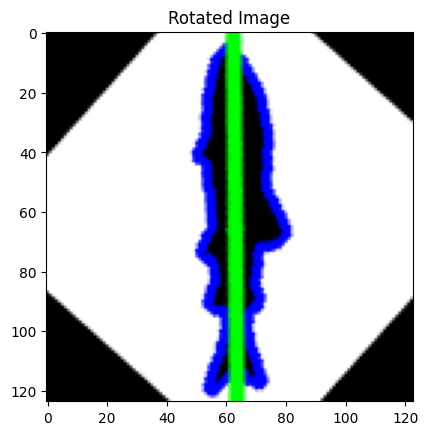

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import math

def drawAxis(img, p, q, color):
    P = list(p)
    q = list(q)
    angle = math.atan2(p[1]-q[1], p[0]-q[0])
    hypotenuse = math.sqrt((p[1]-q[1])*(p[1]-q[1]) + (p[0]-q[0])*(p[0]-q[0]))
    q[0] = p[0] - 3*hypotenuse*math.cos(angle)

    q[1] = p[1] - 3*hypotenuse*math.sin(angle)
    cv2.line(img, (int(p[0]), int(p[1])),(int(q[0]), int(q[1])), color, 3, cv2.LINE_AA)

def getOrientation(pts, img):
    if len(pts) < 2:
        print("Not enough valid points to compute orientation.")
        return None

    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i, 0] = pts[i, 0, 0]
        data_pts[i, 1] = pts[i, 0, 1]

    try:
        mean = np.empty((0))
        mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean)

        cntr = (int(mean[0, 0]), int(mean[0, 1]))
        p1 = (cntr[0] + 0.02 * eigenvectors[0, 0] * eigenvalues[0, 0],
              cntr[1] + 0.02 * eigenvectors[0, 1] * eigenvalues[0, 0])
        p2 = (cntr[0] - 0.02 * eigenvectors[0, 0] * eigenvalues[0, 0],
              cntr[1] - 0.02 * eigenvectors[0, 1] * eigenvalues[0, 0])

        drawAxis(img, cntr, p1, (0, 255, 0))
        drawAxis(img, cntr, p2, (0, 255, 0))

        angle = math.atan2(eigenvectors[0, 1], eigenvectors[0, 0]) * (180 / math.pi)
        return (cntr, angle)
    except:
        print("Error in computing orientation.")
        return None

def calculateOrientation(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, bw = cv2.threshold(gray, 50, 256, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    bw = cv2.bitwise_not(bw)
    contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(img, contours, 0, (0, 0, 255), 2)
    cntr, angle = getOrientation(contours[0], img)
    return img, cntr, angle

def rotateAndDisplay(image, cntr, angle, template_angle):
    rotation_matrix = cv2.getRotationMatrix2D(cntr, -(template_angle - angle), 1)
    img = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    plt.title('Rotated Image')
    plt.imshow(img)
    plt.show()

def processImages(template_image_path, image_dir):
    template_image = cv2.imread(template_image_path)
    gray_template = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
    _, bw_template = cv2.threshold(gray_template, 50, 256, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    bw_template = cv2.bitwise_not(bw_template)
    contours_template, _ = cv2.findContours(bw_template, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(template_image, contours_template, 0, (0, 0, 255), 2)
    cntr_template, template_angle = getOrientation(contours_template[0], template_image)

    for file in os.listdir(image_dir):
        image_path = os.path.join(image_dir, file)
        img, cntr, angle = calculateOrientation(image_path)
        rotateAndDisplay(img, cntr, angle, template_angle)

templateshapepath = "./KIMIA dataset/dude0.png"
image_directory = './KIMIA dataset/'

processImages(templateshapepath, image_directory)


### Steps involved in implementing the Algorithm:
<ol>
<li>Load a reference template image. Convert the image to grayscale, threshold it, and find contours (outlines or boundaries of the image).</li>
<li>Calculate the orientation of the template shape using getOrientation. </li>
<li>Iterate Over Images in Dataset Folder</li>
<li>Loop through all images in the dataset folder. Convert every image to grayscale, threshold it, and find contours.</li>
<li>Determine the orientation of the shape in the image.</li>
<li>Calculate the rotation angle as the difference between the template's orientation and the current image's orientation.</li>
<li>Apply the calculated rotation to the current image.</li>
</ol>